# Synthea EHR Data - Exploratory Data Analysis

This notebook explores the Synthea synthetic EHR data before building the heart failure readmission cohort in SQL.

**Goals:**
- Understand data structure and quality
- Check for missing values and data types
- Explore distributions of key fields
- Preview the heart failure population

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

## Load Data

In [2]:
patients = pd.read_csv('../data/raw/patients.csv')
encounters = pd.read_csv('../data/raw/encounters.csv')
conditions = pd.read_csv('../data/raw/conditions.csv')

print(f"Patients: {patients.shape[0]:,} rows, {patients.shape[1]} columns")
print(f"Encounters: {encounters.shape[0]:,} rows, {encounters.shape[1]} columns")
print(f"Conditions: {conditions.shape[0]:,} rows, {conditions.shape[1]} columns")

Patients: 15,354 rows, 25 columns
Encounters: 1,371,435 rows, 15 columns
Conditions: 866,514 rows, 6 columns


## Patients Table

In [3]:
patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,999-94-9633,S99930485,X51431379X,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503,1.382106e+06,390849.2625
1,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,1936-07-03,NaN,999-76-5032,S99927160,X37795263X,Mr.,Miguel Ángel46,Atencio773,NaN,NaN,M,white,hispanic,M,San Jose San Jose CR,1022 Hermann Quay Suite 79,Springfield,Massachusetts,Hampden County,1118.0,42.119725,-72.529805,2.118565e+06,108146.8010
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,999-83-7940,S99932661,X36822066X,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162,2.007909e+06,333884.4150
3,94d39619-8e17-d248-41b3-9ec1f2d031b2,1954-11-08,2010-01-10,999-84-3708,S99923522,X49705907X,Mr.,Emmett200,Collins926,NaN,NaN,M,white,nonhispanic,M,Baldwinville Massachusetts US,675 Ortiz Mission Unit 59,Hingham,Massachusetts,Plymouth County,2043.0,42.257452,-70.848673,2.637311e+06,149574.3525
4,23832f5d-e045-2541-1626-a65dce9bbcf7,1972-04-13,NaN,999-89-5858,S99939931,X88479701X,Mrs.,Magan944,Green467,NaN,Morar593,M,white,nonhispanic,F,Worcester Massachusetts US,427 Jakubowski Viaduct Unit 76,Edgartown,Massachusetts,Dukes County,NaN,41.364910,-70.519177,1.859584e+06,69524.1780


In [4]:
patients.dtypes

Id                      object
BIRTHDATE               object
DEATHDATE               object
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                  object
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
ZIP                    float64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
dtype: object

In [5]:
# Check for missing values
patients.isnull().sum().sort_values(ascending=False).head(10)

SUFFIX       15092
DEATHDATE    10000
MAIDEN        9730
ZIP           6958
MARITAL        376
PASSPORT       289
PREFIX         267
DRIVERS        234
Id               0
ADDRESS          0
dtype: int64

In [6]:
# Gender distribution
patients['GENDER'].value_counts()

GENDER
M    8231
F    7123
Name: count, dtype: int64

In [7]:
# Race distribution
patients['RACE'].value_counts()

RACE
white       12589
black        1277
asian        1104
hawaiian      167
other         162
native         55
Name: count, dtype: int64

In [8]:
# Calculate age from birthdate
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])
patients['age'] = (pd.Timestamp.now() - patients['BIRTHDATE']).dt.days // 365

patients['age'].describe()

count    15354.000000
mean        76.003256
std         20.871817
min         34.000000
25%         58.000000
50%         81.000000
75%         95.000000
max        103.000000
Name: age, dtype: float64

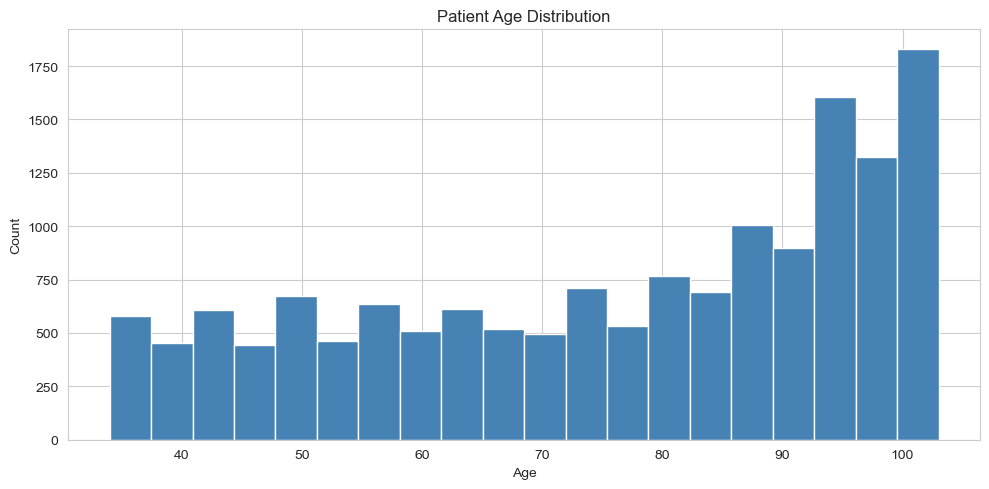

In [9]:
# Age distribution
fig, ax = plt.subplots(figsize=(10, 5))
patients['age'].hist(bins=20, ax=ax, color='steelblue', edgecolor='white')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Patient Age Distribution')
plt.tight_layout()
plt.show()

## Encounters Table

In [10]:
encounters.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,be3e07a4-00ea-4e1f-6e5c-32620712d7e1,1988-04-02T22:07:23Z,1988-04-02T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,0aef5bb7-af50-38c6-934a-8f5a25d81fd1,1f1d9cdf-e594-3527-8f86-6ac68b0a5d30,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,wellness,410620009,Well child visit (procedure),136.8,347.38,0.0,NaN,NaN
1,8ac8a7d4-f24d-20a8-dfa1-812a94f726e6,1991-04-20T22:07:23Z,1991-04-20T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,0aef5bb7-af50-38c6-934a-8f5a25d81fd1,1f1d9cdf-e594-3527-8f86-6ac68b0a5d30,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),136.8,1157.88,0.0,NaN,NaN
2,3e2dd16e-a2f0-6467-1950-84ef2e834c73,1954-08-28T05:14:39Z,1954-08-28T05:29:39Z,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,5e91d1b8-0e6e-32d4-93df-449c6c624492,7f9f32d1-4426-3277-9fbd-8ae3855df313,047f6ec3-6215-35eb-9608-f9dda363a44c,wellness,162673000,General examination of patient (procedure),136.8,704.20,0.0,NaN,NaN
3,2f572a12-0189-7eba-f11c-d308deb08435,1955-09-03T05:14:39Z,1955-09-03T05:29:39Z,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,5e91d1b8-0e6e-32d4-93df-449c6c624492,7f9f32d1-4426-3277-9fbd-8ae3855df313,047f6ec3-6215-35eb-9608-f9dda363a44c,wellness,162673000,General examination of patient (procedure),136.8,1266.54,0.0,NaN,NaN
4,c71f66d6-d085-b323-e1b7-8963e510d4db,1958-09-06T05:14:39Z,1958-09-06T05:29:39Z,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,5e91d1b8-0e6e-32d4-93df-449c6c624492,7f9f32d1-4426-3277-9fbd-8ae3855df313,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),136.8,1491.93,0.0,NaN,NaN


In [11]:
# Encounter class distribution
encounters['ENCOUNTERCLASS'].value_counts()

ENCOUNTERCLASS
wellness      495983
ambulatory    423113
outpatient    234059
urgentcare     92906
inpatient      49636
emergency      48395
home           16037
hospice         7460
snf             3846
Name: count, dtype: int64

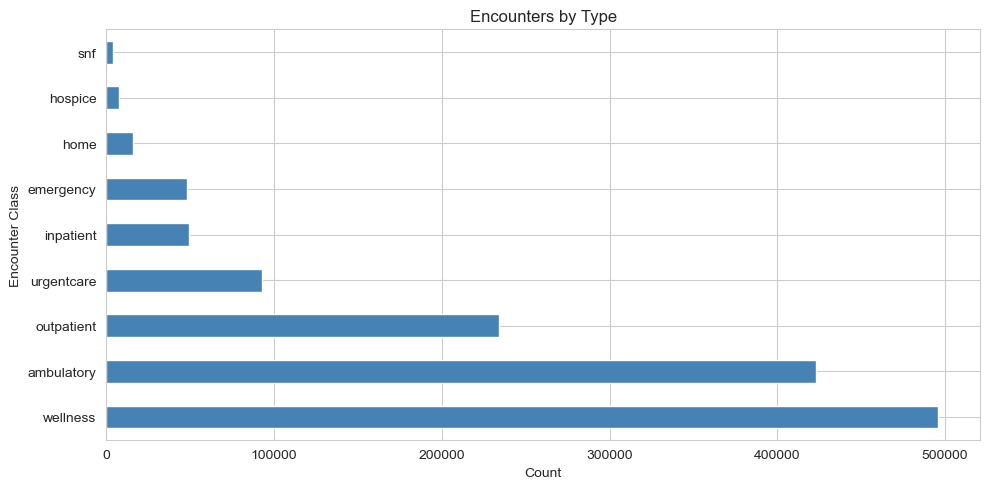

In [12]:
# Visualize encounter types
fig, ax = plt.subplots(figsize=(10, 5))
encounters['ENCOUNTERCLASS'].value_counts().plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Count')
ax.set_ylabel('Encounter Class')
ax.set_title('Encounters by Type')
plt.tight_layout()
plt.show()

In [13]:
# Inpatient encounters specifically
inpatient = encounters[encounters['ENCOUNTERCLASS'] == 'inpatient']
print(f"Inpatient encounters: {len(inpatient):,}")
print(f"Unique patients with inpatient stays: {inpatient['PATIENT'].nunique():,}")

Inpatient encounters: 49,636
Unique patients with inpatient stays: 5,803


In [14]:
# Check for missing stop times (incomplete encounters)
print(f"Encounters with missing STOP time: {encounters['STOP'].isnull().sum():,}")

Encounters with missing STOP time: 0


## Conditions Table

In [15]:
conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1988-04-02,NaN,5605b66b-e92d-c16c-1b83-b8bf7040d51f,be3e07a4-00ea-4e1f-6e5c-32620712d7e1,162864005,Body mass index 30+ - obesity (finding)
1,1954-08-27,NaN,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,3e2dd16e-a2f0-6467-1950-84ef2e834c73,224295006,Only received primary school education (finding)
2,1954-08-27,1955-09-02,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,3e2dd16e-a2f0-6467-1950-84ef2e834c73,160903007,Full-time employment (finding)
3,1954-08-27,1958-09-05,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,3e2dd16e-a2f0-6467-1950-84ef2e834c73,422650009,Social isolation (finding)
4,1955-09-02,1958-09-05,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,2f572a12-0189-7eba-f11c-d308deb08435,160903007,Full-time employment (finding)


In [16]:
# Total unique conditions (SNOMED codes)
print(f"Unique condition codes: {conditions['CODE'].nunique():,}")
print(f"Total condition records: {len(conditions):,}")

Unique condition codes: 239
Total condition records: 866,514


In [17]:
# Top 15 most common conditions
conditions['DESCRIPTION'].value_counts().head(15)

DESCRIPTION
Full-time employment (finding)                      367738
Stress (finding)                                    129153
Part-time employment (finding)                       58699
Limited social contact (finding)                     27545
Social isolation (finding)                           27228
Not in labor force (finding)                         24060
Victim of intimate partner abuse (finding)           20133
Viral sinusitis (disorder)                           17069
Reports of violence in the environment (finding)     12088
Acute viral pharyngitis (disorder)                    9416
Received higher education (finding)                   8817
Body mass index 30+ - obesity (finding)               8662
Acute bronchitis (disorder)                           7654
Prediabetes                                           7147
Anemia (disorder)                                     6740
Name: count, dtype: int64

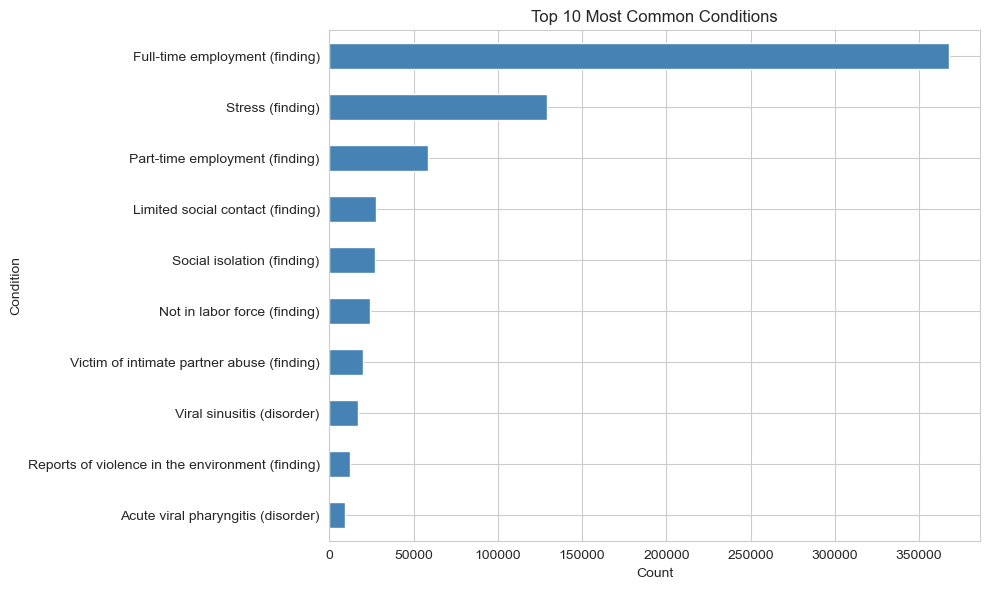

In [18]:
# Visualize top conditions
fig, ax = plt.subplots(figsize=(10, 6))
conditions['DESCRIPTION'].value_counts().head(10).plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Count')
ax.set_ylabel('Condition')
ax.set_title('Top 10 Most Common Conditions')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Heart Failure Cohort Preview

SNOMED code 88805009 = Chronic congestive heart failure

In [19]:
# Find heart failure patients
hf_condition = conditions[conditions['CODE'] == 88805009]
hf_patients = hf_condition['PATIENT'].unique()

print(f"Heart failure condition records: {len(hf_condition):,}")
print(f"Unique heart failure patients: {len(hf_patients):,}")

Heart failure condition records: 1,197
Unique heart failure patients: 1,197


In [20]:
# Heart failure patients with inpatient encounters
hf_inpatient = encounters[
    (encounters['PATIENT'].isin(hf_patients)) & 
    (encounters['ENCOUNTERCLASS'] == 'inpatient') &
    (encounters['STOP'].notna())
]

print(f"Inpatient encounters for HF patients: {len(hf_inpatient):,}")
print(f"Unique HF patients with inpatient stays: {hf_inpatient['PATIENT'].nunique():,}")

Inpatient encounters for HF patients: 4,949
Unique HF patients with inpatient stays: 1,147


In [21]:
# Admissions per HF patient
admissions_per_patient = hf_inpatient.groupby('PATIENT').size()

print("Admissions per HF patient:")
print(admissions_per_patient.describe())

Admissions per HF patient:
count    1147.000000
mean        4.314734
std         8.423736
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        71.000000
dtype: float64


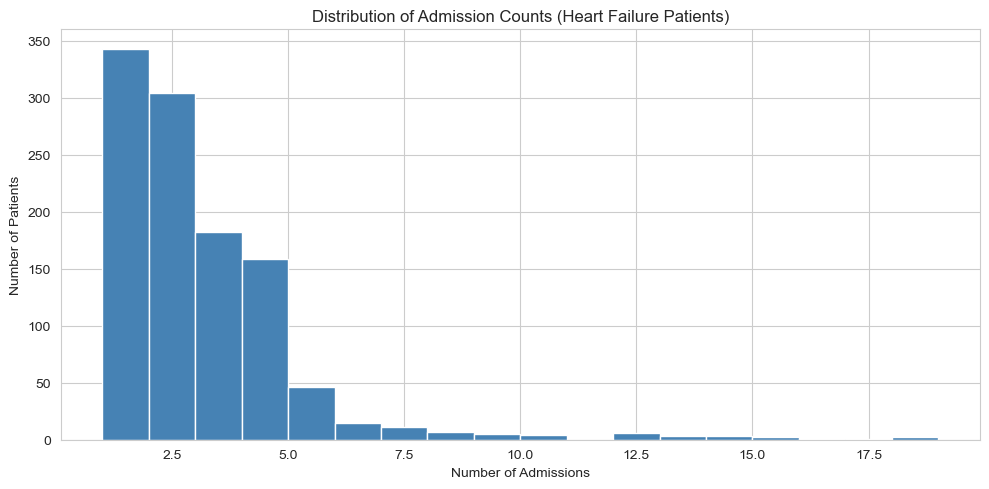

In [22]:
# Distribution of admission counts
fig, ax = plt.subplots(figsize=(10, 5))
admissions_per_patient.hist(bins=range(1, 20), ax=ax, color='steelblue', edgecolor='white')
ax.set_xlabel('Number of Admissions')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of Admission Counts (Heart Failure Patients)')
plt.tight_layout()
plt.show()

## Summary

**Data Quality:**
- Patient records are complete with minimal missing values (DEATHDATE null for living patients is expected)
- Encounter stop times are populated for completed visits
- Conditions use standard SNOMED codes

**Heart Failure Cohort:**
- 1,197 patients with heart failure diagnosis (SNOMED 88805009)
- These patients have multiple inpatient admissions on average
- Cohort is suitable for 30-day readmission analysis

**Next Steps:**
- Build full readmission cohort in SQL using window functions
- Calculate 30-day readmission flag
- Export to Tableau for visualization